In [1]:
import spot, buddy
spot.setup()

Additional testing for synthesis

Testing the different methods to solve

In [2]:
si = spot.synthesis_info()
si.s = spot.synthesis_info.algo_LAR # Use LAR algorithm
game = spot.ltl_to_game("G((F(i0) && F(i1))->(G(i1<->(X(o0)))))", ["o0"], si)
spot.solve_game(game)

True

In [3]:
si.minimize_lvl = 0
mm0 = spot.solved_game_to_mealy(game, si)
msep0 = spot.solved_game_to_separated_mealy(game, si)
msplit0 = spot.solved_game_to_split_mealy(game, si)
assert(spot.is_separated_mealy(mm0)) #Not imposed by the functions pre or post, but results of current impl, change if necessary
assert(spot.is_separated_mealy(msep0))
assert(spot.is_split_mealy(msplit0))
print(mm0.to_str("hoa"))
print(msep0.to_str("hoa"))
print(msplit0.to_str("hoa"))
si.minimize_lvl = 2
mm2 = spot.solved_game_to_mealy(game, si)
msep2 = spot.solved_game_to_separated_mealy(game, si)
msplit2 = spot.solved_game_to_split_mealy(game, si)
assert(spot.is_separated_mealy(mm2)) #Not imposed by the functions pre or post, but results of current impl, change if necessary
assert(spot.is_separated_mealy(msep2))
assert(spot.is_split_mealy(msplit2))
print(mm2.to_str("hoa"))
print(msep2.to_str("hoa"))
print(msplit2.to_str("hoa"))
si.minimize_lvl = 3
mm3 = spot.solved_game_to_mealy(game, si)
msep3 = spot.solved_game_to_separated_mealy(game, si)
msplit3 = spot.solved_game_to_split_mealy(game, si)
assert(spot.is_split_mealy(mm3)) #Not imposed by the functions pre or post, but results of current impl, change if necessary
assert(spot.is_separated_mealy(msep3))
assert(spot.is_split_mealy(msplit3))
print(mm3.to_str("hoa"))
print(msep3.to_str("hoa"))
print(msplit3.to_str("hoa"))

HOA: v1
States: 7
Start: 0
AP: 3 "i1" "i0" "o0"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
controllable-AP: 2
--BODY--
State: 0
[!0&!1] 1
[!0&1] 2
[0&!1] 3
[0&1] 4
State: 1
[0&1&!2] 4
[0&!1&!2] 3
[!0&1&!2] 2
[!0&!1&!2] 1
State: 2
[0&!2] 4
[!0&!2] 2
State: 3
[!0&1&2] 5
[0&1&2] 4
[!0&!1&2] 6
[0&!1&2] 3
State: 4
[!0&2] 5
[0&2] 4
State: 5
[!0&!2] 5
[0&!2] 4
State: 6
[!0&1&!2] 5
[0&1&!2] 4
[!0&!1&!2] 6
[0&!1&!2] 3
--END--
HOA: v1
States: 7
Start: 0
AP: 3 "i1" "i0" "o0"
acc-name: all
Acceptance: 0 t
properties: trans-labels explicit-labels state-acc deterministic
controllable-AP: 2
--BODY--
State: 0
[!0&!1] 1
[!0&1] 2
[0&!1] 3
[0&1] 4
State: 1
[0&1&!2] 4
[0&!1&!2] 3
[!0&1&!2] 2
[!0&!1&!2] 1
State: 2
[0&!2] 4
[!0&!2] 2
State: 3
[!0&1&2] 5
[0&1&2] 4
[!0&!1&2] 6
[0&!1&2] 3
State: 4
[!0&2] 5
[0&2] 4
State: 5
[!0&!2] 5
[0&!2] 4
State: 6
[!0&1&!2] 5
[0&1&!2] 4
[!0&!1&!2] 6
[0&!1&!2] 3
--END--
HOA: v1
States: 21
Start: 0
AP: 3 "i1" "i0" "o0"
acc-n

In [4]:
mus0 = spot.unsplit_mealy(msplit0)
mus2 = spot.unsplit_mealy(msplit2)
mus3 = spot.unsplit_mealy(msplit3)
mmus3 = spot.unsplit_mealy(mm3)

In [5]:
assert(mm0.equivalent_to(msep0))
assert(mm0.equivalent_to(mus0))
assert(mm2.equivalent_to(msep2))
assert(mm2.equivalent_to(mus2))
assert(mmus3.equivalent_to(msep3))
assert(mmus3.equivalent_to(mus3))

Testing related to #495

(0, t)


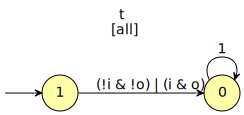

In [6]:
a = spot.translate("i<->o", "parity")
print(a.acc())
a

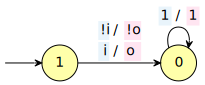

In [7]:
spot.set_synthesis_outputs(a, buddy.bdd_ithvar(a.register_ap("o")))
a

(0, t)


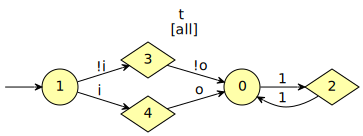

In [8]:
a_s = spot.split_2step(a, True)
print(a.acc())
a_s

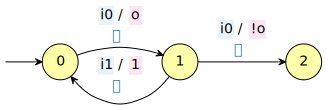

In [9]:
a = spot.make_twa_graph()
a.acc().set_acceptance(spot.acc_code.t())
i0 = buddy.bdd_ithvar(a.register_ap('i0'))
i1 = buddy.bdd_ithvar(a.register_ap('i1'))
o = buddy.bdd_ithvar(a.register_ap('o'))
tt = buddy.bddtrue
a0 = spot.mark_t([0])
a.new_states(3)
a.new_edge(0,1,i0&o,a0)
a.new_edge(1,0,i1,a0)
a.new_edge(1,2,i0&(buddy.bdd_not(o)),a0)
spot.set_synthesis_outputs(a, o)
a

(0, t)


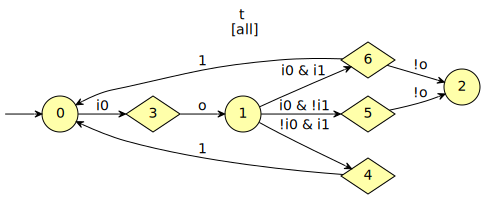

In [10]:
a_snc = spot.split_2step(a, False)
print(a_snc.acc())
a_snc

(1, Fin(0))


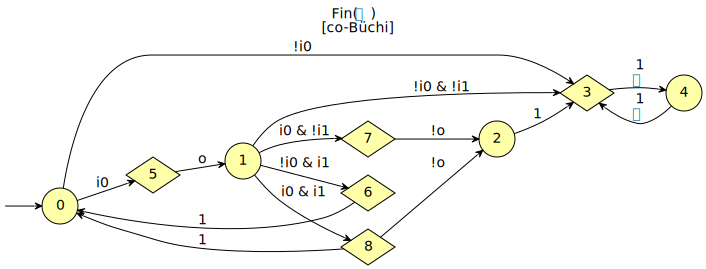

In [11]:
a_s = spot.split_2step(a, True)
print(a_s.acc())
a_s